<a href="https://colab.research.google.com/github/Vasanth12414/Deep-Learning-Models/blob/main/Copy_of_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download safurahajiheidari/kidney-stone-images

Dataset URL: https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images
License(s): other
 90% 19.0M/21.1M [00:01<00:00, 14.0MB/s]
100% 21.1M/21.1M [00:01<00:00, 11.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/kidney-stone-images.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
DATADIR = '/content/KidneyDisease'
CATEGORIES  = ['TestImages','TrainImages','ValidImages']

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

DATADIR = '/content/KidneyDisease'
CATEGORIES  = ['TestImages','TrainImages','ValidImages']

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    images = os.listdir(path)

    fig, axes = plt.subplots(1, 5, figsize=(15, 4))
    fig.suptitle(f'{category}', fontsize=18)

    for i in range(5):
        img_name = images[np.random.randint(0, len(images))]
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path)

        axes[i].imshow(img_array)
        axes[i].axis('off')

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/KidneyDisease/TestImages'

In [ ]:
x = []
y = []
for features , labels in training_data:
  x.append(features)
  y.append(labels)

NameError: name 'training_data' is not defined

In [ ]:
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y = np.array(y)


NameError: name 'IMG_SIZE' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model

In [ ]:
def segnet(input_shape=(256, 256, 3), num_classes=2):
    inputs = Input(shape=input_shape)

In [ ]:
def segnet(input_shape=(256, 256, 3), num_classes=2):
    inputs = Input(shape=input_shape)
    # Encoder
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    # ... rest of your segnet function ... #

# Example of calling the function:
model = segnet()

In [ ]:
def segnet(input_shape=(256, 256, 3), num_classes=2):
    inputs = Input(shape=input_shape)
    # Encoder
    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    # ... rest of your segnet function ... #

# Example of calling the function:
model = segnet()

In [ ]:
input_shape = (256, 256, 3)  # Define input shape explicitly
inputs = Input(shape=input_shape, dtype=tf.float32)


In [ ]:
import numpy as np

# ... your existing code ...

x = []
y = []
for features, labels in training_data:
    x.append(features)
    y.append(labels)

# Convert x to float32 before reshaping
x = np.array(x, dtype=np.float32).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

# ... rest of your code ...

NameError: name 'training_data' is not defined

In [ ]:
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

ValueError: Layer "conv2d_4" expects 1 input(s), but it received 0 input tensors. Inputs received: []

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model

def segnet(input_shape=(256, 256, 3), num_classes=2):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Ensure model input shape is correctly defined
input_shape = (256, 256, 3)
model = segnet(input_shape=input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64, 64, 128)         │             5

 Total params: 1,924,546 (7.34 MB)

 Trainable params: 1,922,242 (7.33 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [ ]:
model = segnet(input_shape=(256, 256, 3))


In [ ]:
inputs = Input(shape=input_shape, dtype=tf.float32)


In [ ]:
import os
os.makedirs('dataset/train', exist_ok=True)
os.makedirs('dataset/val', exist_ok=True)


In [ ]:
import os

dataset_path = "dataset"
if os.path.exists(dataset_path):
    print("Dataset directory exists.")
    print("Contents:", os.listdir(dataset_path))
else:
    print("Dataset directory NOT found.")


Dataset directory exists.
Contents: ['train', 'val']


In [ ]:
os.makedirs("dataset/train/normal_kidney", exist_ok=True)
os.makedirs("dataset/train/diseased_kidney", exist_ok=True)
os.makedirs("dataset/val/normal_kidney", exist_ok=True)
os.makedirs("dataset/val/diseased_kidney", exist_ok=True)


In [ ]:
for folder in ["dataset/train", "dataset/val"]:
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            print(f"Class '{subfolder}' has {len(os.listdir(subfolder_path))} images.")


Class 'normal_kidney' has 0 images.
Class 'diseased_kidney' has 0 images.
Class 'normal_kidney' has 0 images.
Class 'diseased_kidney' has 0 images.


In [ ]:
import os

dataset_path = "dataset/train"
if not os.path.exists(dataset_path):
    print("Error: Dataset directory does not exist.")
else:
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            print(f"Class '{category}' contains {len(os.listdir(category_path))} images.")


Class 'normal_kidney' contains 0 images.
Class 'diseased_kidney' contains 0 images.


In [ ]:
import os
print(os.listdir('/content'))


['.config', 'README.roboflow.txt', 'dataset', 'train', 'data.yaml', 'valid', 'test', 'README.dataset.txt', 'kidney-stone-images.zip', 'sample_data']


In [ ]:
zip_path = "/content/kidney-stone-images.zip"  # Correct filename
extract_path = "/content/dataset"

import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")
print(os.listdir(extract_path))  # Verify extracted files


Extraction Complete!
['README.roboflow.txt', 'train', 'val', 'data.yaml', 'valid', 'test', 'README.dataset.txt']


In [ ]:
# Install necessary libraries
!pip install tensorflow keras numpy matplotlib opencv-python scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [ ]:
def build_segnet(input_shape=(256, 256, 3), num_classes=1):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(64, (3, 3), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2))(x)

    # Decoder
    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = UpSampling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = UpSampling2D((2, 2))(x)

    outputs = Conv2D(num_classes, (1, 1), activation="sigmoid")(x)

    model = Model(inputs, outputs)
    return model

# Build model
segnet_model = build_segnet()
segnet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
segnet_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 64, 64, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,333,377 (5.09 MB)

 Trainable params: 1,331,585 (5.08 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
import os

dataset_path = "/content/dataset"
for root, dirs, files in os.walk(dataset_path):
    print(root)


/content/dataset
/content/dataset/train
/content/dataset/train/normal_kidney
/content/dataset/train/labels
/content/dataset/train/images
/content/dataset/train/diseased_kidney
/content/dataset/val
/content/dataset/val/normal_kidney
/content/dataset/val/diseased_kidney
/content/dataset/valid
/content/dataset/valid/labels
/content/dataset/valid/images
/content/dataset/test
/content/dataset/test/labels
/content/dataset/test/images


In [ ]:
print(os.listdir("/content/dataset"))
print(os.listdir("/content/dataset/train"))  # Check what exists inside 'train'


['README.roboflow.txt', 'train', 'val', 'data.yaml', 'valid', 'test', 'README.dataset.txt']
['normal_kidney', 'labels', 'images', 'diseased_kidney']


In [ ]:
train_masks = load_images_from_folder('/content/dataset/train/labels')


NameError: name 'load_images_from_folder' is not defined

In [ ]:
masks_path = "/content/dataset/train/masks"  # Update if needed
if os.path.exists(masks_path):
    print("Mask images:", os.listdir(masks_path)[:5])  # Show first 5 images
else:
    print("Masks folder not found!")


Masks folder not found!


In [ ]:
import os

dataset_path = "/content/dataset"

for root, dirs, files in os.walk(dataset_path):
    print(f"📂 {root}")  # Print folder paths
    for dir_name in dirs:
        print(f"   📁 {dir_name}")  # Print subfolders
    for file_name in files[:5]:  # Show only first 5 files per folder
        print(f"   📄 {file_name}")


📂 /content/dataset
   📁 train
   📁 val
   📁 valid
   📁 test
   📄 README.roboflow.txt
   📄 data.yaml
   📄 README.dataset.txt
📂 /content/dataset/train
   📁 normal_kidney
   📁 labels
   📁 images
   📁 diseased_kidney
📂 /content/dataset/train/normal_kidney
📂 /content/dataset/train/labels
   📄 1-3-46-670589-33-1-63712447732791734200001-5702195822475474432_png_jpg.rf.ebda4dc5bbf64e745d12917da8c059d5.txt
   📄 1-3-46-670589-33-1-63715478193642371600001-5440760697116097172_png_jpg.rf.192d1a51e2ee968936cf1e4b7a1937d2.txt
   📄 1-3-46-670589-33-1-63726947282432570300001-5751624652120207417_png_jpg.rf.19ffe4b27298f94e028eee08c6065159.txt
   📄 1-3-46-670589-33-1-63738097354936340700001-5510602427171527198_png_jpg.rf.a0d00019f05d22751070a8374f090e5c.txt
   📄 1-3-46-670589-33-1-63714778963981517000001-5059021058321390949_png_jpg.rf.0acf3037a0e1dd42d694d0448b8823de.txt
📂 /content/dataset/train/images
   📄 1-3-46-670589-33-1-63732387322808844700001-5716870683158271218_png_jpg.rf.bd5a754662fe08c7fa931f18a

In [ ]:
label_file = "/content/dataset/train/labels/1-3-46-670589-33-1-63712447732791734200001-5702195822475474432_png_jpg.rf.ebda4dc5bbf64e745d12917da8c059d5.txt"

with open(label_file, "r") as f:
    print(f.read())


0 0.7787723785166241 0.6671875 0.04092071611253197 0.053125
0 0.7480818414322251 0.578125 0.043478260869565216 0.065625
0 0.31841432225063937 0.6734375 0.043478260869565216 0.05625


In [ ]:
import os
import numpy as np
import cv2

# Paths
images_path = "/content/dataset/train/images"
labels_path = "/content/dataset/train/labels"
masks_path = "/content/dataset/train/masks"  # Save generated masks here

# Ensure mask directory exists
os.makedirs(masks_path, exist_ok=True)

# Image size (assuming all images are the same size)
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256

def yolo_to_mask(label_file, image_file, mask_file):
    # Read image to get dimensions
    img = cv2.imread(image_file)
    h, w, _ = img.shape  # Get real image size

    # Create empty mask
    mask = np.zeros((h, w), dtype=np.uint8)

    # Read YOLO labels
    with open(label_file, "r") as f:
        lines = f.readlines()

    for line in lines:
        values = line.strip().split()
        class_id = int(values[0])  # Object class
        x_center, y_center, bbox_width, bbox_height = map(float, values[1:])

        # Convert YOLO format to pixel coordinates
        x_min = int((x_center - bbox_width / 2) * w)
        y_min = int((y_center - bbox_height / 2) * h)
        x_max = int((x_center + bbox_width / 2) * w)
        y_max = int((y_center + bbox_height / 2) * h)

        # Draw filled rectangle as mask
        cv2.rectangle(mask, (x_min, y_min), (x_max, y_max), (255), thickness=-1)  # White mask

    # Save mask
    cv2.imwrite(mask_file, mask)

# Process all images
for image_file in os.listdir(images_path):
    image_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, image_file.replace(".jpg", ".txt"))  # Adjust for your dataset
    mask_path = os.path.join(masks_path, image_file.replace(".jpg", ".png"))  # Save as PNG

    if os.path.exists(label_path):  # Ensure label exists
        yolo_to_mask(label_path, image_path, mask_path)

print("✅ Masks generated successfully!")


✅ Masks generated successfully!


In [ ]:
train_masks = load_images_from_folder('/content/dataset/train/masks')


NameError: name 'load_images_from_folder' is not defined

In [ ]:
masks_path = "/content/dataset/train/masks"  # Update if needed
if os.path.exists(masks_path):
    print("Mask images:", os.listdir(masks_path)[:5])  # Show first 5 images
else:
    print("Masks folder not found!")


Mask images: ['1-3-46-670589-33-1-63724531796295565800001-4634656353222305293_png_jpg.rf.364fe8d3de4454599c06f090d3b16379.png', '1-3-46-670589-33-1-63724531796395571600001-5462167640354553780_png_jpg.rf.976578382d7848b02dfbfb915d79623d.png', '1-3-46-670589-33-1-63743799049657989200001-4835072821949707374_png_jpg.rf.abddb6b4048869d158b29dff4abd7e2d.png', '1-3-46-670589-33-1-63717795135056984400001-4922623826060146200_png_jpg.rf.180e7fd701ab11c5b3c427063e5db2a1.png', '1-3-46-670589-33-1-63716498031787671900001-4928367551661333816_png_jpg.rf.c0407505c21ad8b68ea2871296ed1f64.png']


In [ ]:
import zipfile

zip_path = "/content/kidney-stone-images.zip"  # Ensure correct file name
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset re-extracted!")


Dataset re-extracted!


In [ ]:
import os

dataset_path = "/content/dataset/train"
print("Contents of train folder:", os.listdir(dataset_path))


Contents of train folder: ['normal_kidney', 'masks', 'labels', 'images', 'diseased_kidney']


In [ ]:
import os
print("Valid labels:", os.listdir('/content/dataset/valid/labels')[:5])  # Show first 5 files


Valid labels: ['1-3-46-670589-33-1-63711052073289652200001-5146988839427576383_png_jpg.rf.705171aa766f3d0fb1f768b5dbb9e8a8.txt', '1-3-46-670589-33-1-63711567725526930300001-5493674997551014529_png_jpg.rf.ef0eb0f3e50d099351750f1cd6b54929.txt', '1-3-46-670589-33-1-63743635328195355400001-5082061588950920814_png_jpg.rf.0d37e5c8baa574024736cc7be2514298.txt', '1-3-46-670589-33-1-63729486115252671800001-4961223282818481628_png_jpg.rf.5bcba5e3364ad903a1fa45dd98ee466b.txt', '1-3-46-670589-33-1-63743642389427137000001-5081444836827024830_png_jpg.rf.c615bfac260836c752b07d12d1170ce2.txt']


In [ ]:
label_file = "/content/dataset/valid/labels/" + os.listdir('/content/dataset/valid/labels')[0]
with open(label_file, "r") as f:
    print(f.read())


0 0.731457800511509 0.596875 0.015345268542199489 0.015625


In [ ]:
import os
import cv2
import numpy as np

def yolo_to_mask(image_path, label_path, mask_save_path, img_size=(256, 256)):
    """ Converts YOLO labels to binary segmentation masks. """
    img = cv2.imread(image_path)
    h, w, _ = img.shape  # Original image size
    mask = np.zeros((h, w), dtype=np.uint8)

    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            data = line.strip().split()
            _, x_center, y_center, bbox_w, bbox_h = map(float, data)

            # Convert YOLO format to pixel values
            x1 = int((x_center - bbox_w / 2) * w)
            y1 = int((y_center - bbox_h / 2) * h)
            x2 = int((x_center + bbox_w / 2) * w)
            y2 = int((y_center + bbox_h / 2) * h)

            # Draw rectangle (bounding box) as mask
            cv2.rectangle(mask, (x1, y1), (x2, y2), (255), thickness=-1)

    mask = cv2.resize(mask, img_size)  # Resize mask
    cv2.imwrite(mask_save_path, mask)

def generate_masks(images_folder, labels_folder, masks_folder):
    """ Generate masks for all images in dataset. """
    os.makedirs(masks_folder, exist_ok=True)

    for filename in os.listdir(images_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(images_folder, filename)
            label_path = os.path.join(labels_folder, filename.replace(".jpg", ".txt").replace(".png", ".txt"))
            mask_save_path = os.path.join(masks_folder, filename)

            if os.path.exists(label_path):
                yolo_to_mask(image_path, label_path, mask_save_path)

# Example usage
generate_masks('/content/dataset/train/images', '/content/dataset/train/labels', '/content/dataset/train/masks')


In [ ]:
import os
import cv2
import numpy as np

# Paths
image_path = "/content/dataset/train/images"
label_path = "/content/dataset/train/labels"
mask_path = "/content/dataset/train/masks"

# Ensure mask directory exists
os.makedirs(mask_path, exist_ok=True)

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 256, 256

# Function to create masks
def create_mask(image_name):
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)  # Blank mask

    label_file = os.path.join(label_path, image_name.replace(".jpg", ".txt"))

    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f:
                data = line.strip().split()
                class_id, x_center, y_center, width, height = map(float, data)

                # Convert to pixel coordinates
                x_min = int((x_center - width / 2) * IMG_WIDTH)
                y_min = int((y_center - height / 2) * IMG_HEIGHT)
                x_max = int((x_center + width / 2) * IMG_WIDTH)
                y_max = int((y_center + height / 2) * IMG_HEIGHT)

                # Draw bounding box as white mask
                cv2.rectangle(mask, (x_min, y_min), (x_max, y_max), 255, thickness=-1)

    return mask

# Generate masks
for img_name in os.listdir(image_path):
    if img_name.endswith(".jpg"):
        mask = create_mask(img_name)
        cv2.imwrite(os.path.join(mask_path, img_name.replace(".jpg", ".png")), mask)

print("✅ Masks generated successfully!")


✅ Masks generated successfully!


In [ ]:
import os

mask_folder = "/content/dataset/valid/masks"
if os.path.exists(mask_folder):
    print("✅ Folder exists!")
    print("Files:", os.listdir(mask_folder)[:5])  # Print first 5 files
else:
    print("❌ Folder does not exist!")


❌ Folder does not exist!


In [ ]:
import os
import cv2
import numpy as np

# Define paths
image_path = "/content/dataset/valid/images"
label_path = "/content/dataset/valid/labels"
mask_path = "/content/dataset/valid/masks"

# Create the masks folder if it doesn't exist
os.makedirs(mask_path, exist_ok=True)

# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 256, 256  # Adjust based on your dataset

# Function to create masks
def create_mask(image_name):
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)  # Blank mask

    label_file = os.path.join(label_path, image_name.replace(".jpg", ".txt"))

    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f:
                data = line.strip().split()
                class_id, x_center, y_center, width, height = map(float, data)

                # Convert YOLO format to pixel coordinates
                x_min = int((x_center - width / 2) * IMG_WIDTH)
                y_min = int((y_center - height / 2) * IMG_HEIGHT)
                x_max = int((x_center + width / 2) * IMG_WIDTH)
                y_max = int((y_center + height / 2) * IMG_HEIGHT)

                # Draw bounding box as a white mask
                cv2.rectangle(mask, (x_min, y_min), (x_max, y_max), 255, thickness=-1)

    return mask

# Generate masks for each image
for img_name in os.listdir(image_path):
    if img_name.endswith(".jpg"):
        mask = create_mask(img_name)
        cv2.imwrite(os.path.join(mask_path, img_name.replace(".jpg", ".png")), mask)

print("✅ Masks generated successfully!")


✅ Masks generated successfully!


In [ ]:
valid_masks = load_images_from_folder("/content/dataset/valid/masks", is_mask=True)
print("✅ Valid masks loaded successfully!")


NameError: name 'load_images_from_folder' is not defined

In [ ]:
print("Train Images Shape:", train_images.shape)
print("Train Masks Shape:", train_masks.shape)
print("Valid Images Shape:", valid_images.shape)
print("Valid Masks Shape:", valid_masks.shape)


NameError: name 'train_images' is not defined

In [ ]:
image_files = sorted(os.listdir("/content/dataset/train/images"))
mask_files = sorted(os.listdir("/content/dataset/train/masks"))

print(f"Total images: {len(image_files)}")
print(f"Total masks: {len(mask_files)}")


Total images: 1054
Total masks: 2108


In [ ]:
def load_images_masks(image_folder, mask_folder, target_size=(256, 256)):
    images, masks = [], []
    image_files = sorted(os.listdir(image_folder))
    mask_files = sorted(os.listdir(mask_folder))

    for img_file, mask_file in zip(image_files, mask_files):
        img_path = os.path.join(image_folder, img_file)
        mask_path = os.path.join(mask_folder, mask_file)

        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        if img is not None and mask is not None:
            img = cv2.resize(img, target_size) / 255.0
            mask = cv2.resize(mask, target_size) / 255.0
            mask = np.expand_dims(mask, axis=-1)  # Ensure correct shape

            images.append(img)
            masks.append(mask)

    return np.array(images), np.array(masks)

# Load correctly matched images and masks
train_images, train_masks = load_images_masks("/content/dataset/train/images", "/content/dataset/train/masks")
valid_images, valid_masks = load_images_masks("/content/dataset/valid/images", "/content/dataset/valid/masks")

print("✅ Data reloaded successfully!")


✅ Data reloaded successfully!


In [ ]:
import os
import numpy as np
import cv2

def load_images_from_folder(folder, target_size=(256, 256), is_mask=False):
    images = []
    for filename in sorted(os.listdir(folder)):  # Ensure consistency in order
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if is_mask else cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, target_size)
            if is_mask:
                img = np.expand_dims(img, axis=-1)  # Add channel for masks
                img = img / 255.0  # Normalize masks
            else:
                img = img / 255.0  # Normalize images
            images.append(img)
    return np.array(images)

# Reload images and masks
train_images = load_images_from_folder("/content/dataset/train/images")
train_masks = load_images_from_folder("/content/dataset/train/masks", is_mask=True)
valid_images = load_images_from_folder("/content/dataset/valid/images")
valid_masks = load_images_from_folder("/content/dataset/valid/masks", is_mask=True)

# Print shapes
print("Train Images Shape:", train_images.shape)
print("Train Masks Shape:", train_masks.shape)
print("Valid Images Shape:", valid_images.shape)
print("Valid Masks Shape:", valid_masks.shape)


Train Images Shape: (1054, 256, 256, 3)
Train Masks Shape: (2108, 256, 256, 1)
Valid Images Shape: (123, 256, 256, 3)
Valid Masks Shape: (123, 256, 256, 1)


In [ ]:
import os

print("Number of train images:", len(os.listdir("/content/dataset/train/images")))
print("Number of train masks:", len(os.listdir("/content/dataset/train/masks")))


Number of train images: 1054
Number of train masks: 2108


In [ ]:
train_masks = train_masks[:len(train_images)]


In [ ]:
train_images = train_images[:min(len(train_images), len(train_masks))]
train_masks = train_masks[:min(len(train_images), len(train_masks))]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_segnet(input_shape=(256, 256, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # Encoder (Convolutional layers + MaxPooling)
    x = layers.Conv2D(64, (3, 3), padding="same", activation="relu")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), padding="same", activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Decoder (Upsampling + Convolutional layers)
    x = layers.Conv2DTranspose(256, (3, 3), strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(128, (3, 3), strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding="same", activation="relu")(x)

    # Output layer (Sigmoid for binary segmentation)
    outputs = layers.Conv2D(num_classes, (1, 1), activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    return model

# Build and compile the model
segnet_model = build_segnet()
segnet_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("✅ SegNet model created and compiled successfully!")


✅ SegNet model created and compiled successfully!


In [ ]:
  segnet_model.fit(
    train_images, train_masks,
    validation_data=(valid_images, valid_masks),
    epochs=20,
    batch_size=16
)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 925s 14s/step - accuracy: 0.9447 - loss: 0.2644 - val_accuracy: 0.9946 - val_loss: 0.0415
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 976s 14s/step - accuracy: 0.9893 - loss: 0.0521 - val_accuracy: 0.9946 - val_loss: 0.0409
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 962s 15s/step - accuracy: 0.9900 - loss: 0.0503 - val_accuracy: 0.9946 - val_loss: 0.0389
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 947s 14s/step - accuracy: 0.9900 - loss: 0.0482 - val_accuracy: 0.9946 - val_loss: 0.0388
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 916s 14s/step - accuracy: 0.9898 - loss: 0.0494 - val_accuracy: 0.9946 - val_loss: 0.0393
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 926s 14s/step - accuracy: 0.9902 - loss: 0.0457 - val_accuracy: 0.9946 - val_loss: 0.0415
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 920s 14s/step - accuracy: 0.9899 - loss: 0.0484 - val_accuracy: 0.9946 - val_loss: 0.0404
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 923s 14s/step - accuracy: 0.9902 - loss: 0.0462 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


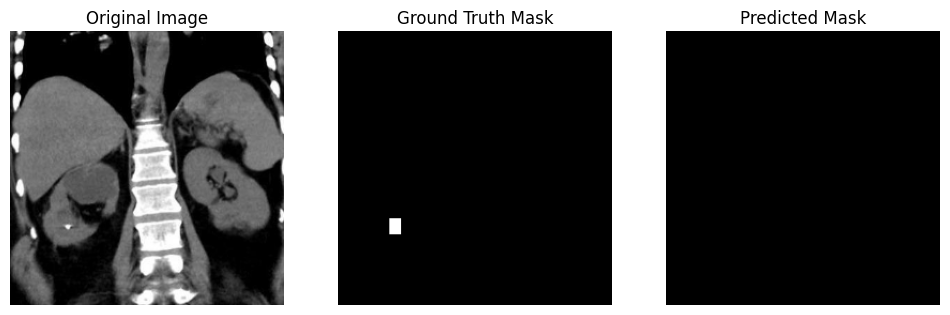

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a random image from the validation set
random_index = np.random.randint(0, len(valid_images))
sample_image = valid_images[random_index]
sample_mask = valid_masks[random_index]

# Predict the mask
predicted_mask = segnet_model.predict(np.expand_dims(sample_image, axis=0))[0]

# Convert the mask to binary (thresholding)
threshold = 0.5
predicted_mask = (predicted_mask > threshold).astype(np.uint8)

# Plot the original image, ground truth mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(sample_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(sample_mask.squeeze(), cmap="gray")
axes[1].set_title("Ground Truth Mask")
axes[1].axis("off")

axes[2].imshow(predicted_mask.squeeze(), cmap="gray")
axes[2].set_title("Predicted Mask")
axes[2].axis("off")

plt.show()


In [ ]:
segnet_model.save("segnet_kidney_stone.h5")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model
segnet_model = load_model("segnet_kidney_stone.h5")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [ ]:
loss, accuracy = segnet_model.evaluate(valid_images, valid_masks)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step - accuracy: 0.9934 - loss: 0.0443
Model Accuracy: 99.46%


4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 8s/step


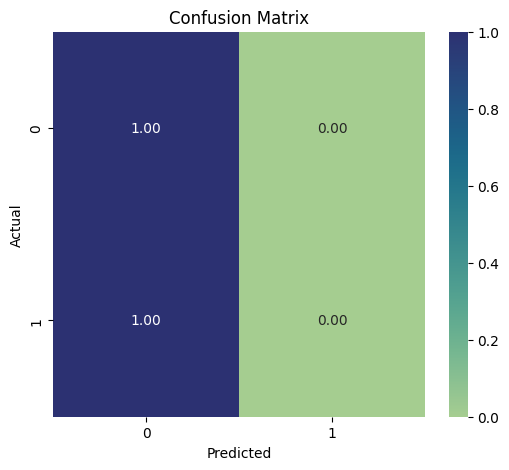

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
predictions = segnet_model.predict(valid_images)

# Convert predictions to binary (assuming threshold 0.5 for segmentation)
predictions_binary = (predictions > 0.5).astype(np.uint8)
valid_masks_binary = (valid_masks > 0.5).astype(np.uint8)  # Ground truth masks

# Flatten arrays for confusion matrix
y_true = valid_masks_binary.flatten()
y_pred = predictions_binary.flatten()

# Compute confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
